## LSH

In [1]:
import time
import psutil
from collections import defaultdict
import numpy as np
from sklearn.neighbors import NearestNeighbors

# data generation:
def generate_vectors(num_vectors, vector_dim):
    np.random.seed(42)
    vectors = np.random.rand(num_vectors, vector_dim)
    return vectors

# LSH part
def generate_random_projections(num_projections, vector_dim):
    np.random.seed(42)
    projections = np.random.randn(num_projections, vector_dim)
    return projections

def hash_function(vector, projection):
    dot_product = np.dot(vector, projection)
    return 1 if dot_product > 0 else 0

class LSH:
    def __init__(self, num_projections, vector_dim):
        self.num_projections = num_projections
        self.vector_dim = vector_dim
        self.projections = generate_random_projections(num_projections, vector_dim)
        self.hash_tables = [defaultdict(list) for _ in range(num_projections)]
    
    def hash_vector(self, vector):
        hashes = []
        for i, projection in enumerate(self.projections):
            hash_key = hash_function(vector, projection)
            hashes.append(hash_key)
        return hashes
    
    def add_vector(self, vector, vector_index):
        hashes = self.hash_vector(vector)
        for i, hash_key in enumerate(hashes):
            self.hash_tables[i][hash_key].append(vector_index)
    
    def query(self, vector, vectors, num_results):
        query_hashes = self.hash_vector(vector)
        candidate_indices = set()
        
        for i, hash_key in enumerate(query_hashes):
            candidate_indices.update(self.hash_tables[i][hash_key])
        
        similar_items = []
        for idx in candidate_indices:
            candidate_vector = vectors[idx]
            distance = np.linalg.norm(vector - candidate_vector)  # Euclidean distance
            similar_items.append((idx, distance))
        
        similar_items.sort(key=lambda x: x[1])
        return similar_items[:num_results]


### Dataset(N=1000, D=10)

In [2]:
# training time
start_time = time.time()

vectors = generate_vectors(num_vectors=1000, vector_dim=10)
lsh = LSH(num_projections=10, vector_dim=10)

for idx, vector in enumerate(vectors):
    lsh.add_vector(vector, idx)

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time:.4f} seconds")

# testing time
query_vector = vectors[0]
k = 5

start_time = time.time()
similar_items = lsh.query(query_vector, vectors, k + 1)
end_time = time.time()

testing_time = end_time - start_time
print(f"Testing time: {testing_time:.4f} seconds")

# Measure memory utilization
# Memory utilization includes the hash tables and other structures within the LSH model.
memory_info = psutil.Process().memory_info()
print(f"Memory usage: {memory_info.rss / (1024 ** 2):.4f} MB")  # RSS in MB

# the results
print("Query Vector Index:", 0)
print("Similar Items (index, distance):")
for idx, similarity in similar_items:
    print(f"Index: {idx}, Distance: {similarity:.4f}")

Training time: 0.0262 seconds
Testing time: 0.0040 seconds
Memory usage: 127.9961 MB
Query Vector Index: 0
Similar Items (index, distance):
Index: 0, Distance: 0.0000
Index: 634, Distance: 0.5494
Index: 94, Distance: 0.5872
Index: 219, Distance: 0.6157
Index: 93, Distance: 0.6375
Index: 581, Distance: 0.6385


### Dataset(N=1000, D=100)

In [4]:
# training time
start_time = time.time()

vectors = generate_vectors(num_vectors=1000, vector_dim=100)
lsh = LSH(num_projections=10, vector_dim=100)

for idx, vector in enumerate(vectors):
    lsh.add_vector(vector, idx)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# testing time
start_time_2 = time.time()
query_vector = vectors[0]
num_results = 5

similar_items = lsh.query(query_vector, vectors, num_results + 1)

end_time_2 = time.time()

testing_time = end_time_2 - start_time_2
print(f"Testing time: {testing_time:.4f} seconds")

# Measure memory utilization
# Memory utilization includes the hash tables and other structures within the LSH model.
memory_info = psutil.Process().memory_info()
print(f"Memory usage: {memory_info.rss / (1024 ** 2):.4f} MB")  # RSS in MB

Training time: 0.0272 seconds
Testing time: 0.0050 seconds
Memory usage: 129.6055 MB


### Dataset(N=10000, D=10)

In [3]:
# training time
start_time = time.time()

vectors = generate_vectors(num_vectors=10000, vector_dim=10)
lsh = LSH(num_projections=10, vector_dim=10)

for idx, vector in enumerate(vectors):
    lsh.add_vector(vector, idx)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# testing time
start_time_2 = time.time()
query_vector = vectors[0]
num_results = 5

similar_items = lsh.query(query_vector, vectors, num_results + 1)

end_time_2 = time.time()

testing_time = end_time_2 - start_time_2
print(f"Testing time: {testing_time:.4f} seconds")

# Measure memory utilization
# Memory utilization includes the hash tables and other structures within the LSH model.
memory_info = psutil.Process().memory_info()
print(f"Memory usage: {memory_info.rss / (1024 ** 2):.4f} MB")  # RSS in MB

Training time: 0.2060 seconds
Testing time: 0.0499 seconds
Memory usage: 131.6211 MB


### Dataset(N=10000, D=100)

In [4]:
# training time
start_time = time.time()

vectors = generate_vectors(num_vectors=10000, vector_dim=100)
lsh = LSH(num_projections=10, vector_dim=100)

for idx, vector in enumerate(vectors):
    lsh.add_vector(vector, idx)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# testing time
start_time_2 = time.time()
query_vector = vectors[0]
num_results = 5

similar_items = lsh.query(query_vector, vectors, num_results + 1)

end_time_2 = time.time()

testing_time = end_time_2 - start_time_2
print(f"Testing time: {testing_time:.4f} seconds")

# Measure memory utilization
# Memory utilization includes the hash tables and other structures within the LSH model.
memory_info = psutil.Process().memory_info()
print(f"Memory usage: {memory_info.rss / (1024 ** 2):.4f} MB")  # RSS in MB

Training time: 0.3200 seconds
Testing time: 0.0539 seconds
Memory usage: 139.3359 MB


### Approximate KNN vs Exact KNN

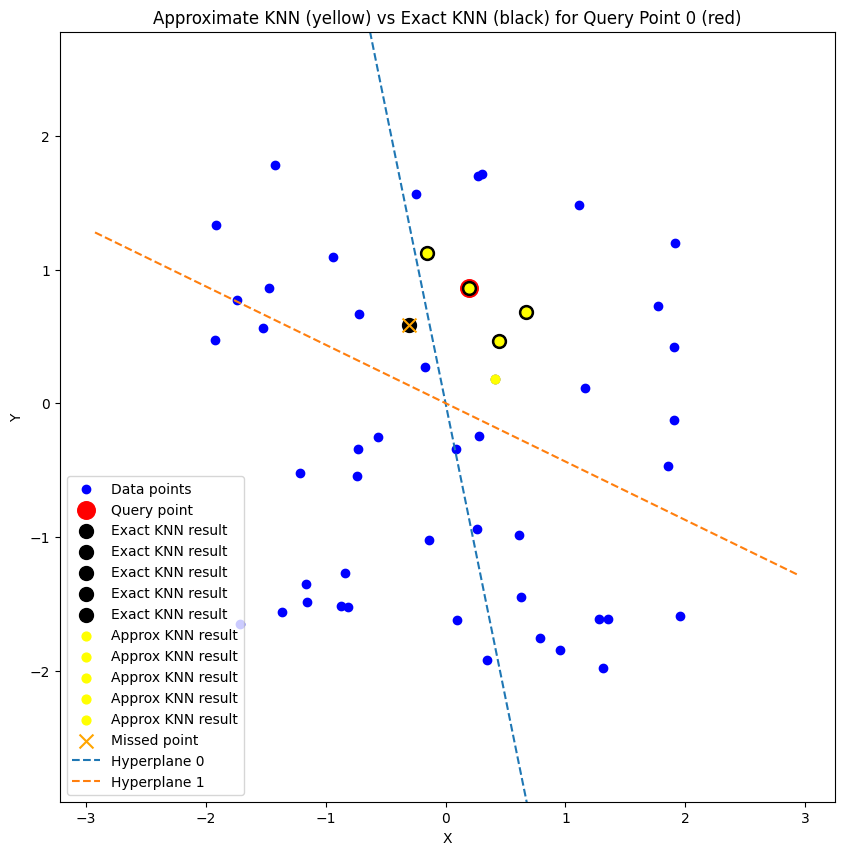

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict

# alternate LSH class:

def generate_random_projections(num_projections, vector_dim):
    np.random.seed(0)
    projections = np.random.randn(num_projections, vector_dim)
    return projections

def hash_function(vector, projection):
    dot_product = np.dot(vector, projection)
    return 1 if dot_product > 0 else 0

class LSH:
    def __init__(self, num_projections, vector_dim):
        self.num_projections = num_projections
        self.vector_dim = vector_dim
        self.projections = generate_random_projections(num_projections, vector_dim)
        self.hash_tables = [defaultdict(list) for _ in range(num_projections)]
    
    def hash_vector(self, vector):
        hashes = []
        for i, projection in enumerate(self.projections):
            hash_key = hash_function(vector, projection)
            hashes.append(hash_key)
        return hashes
    
    def add_vector(self, vector, vector_index):
        hashes = self.hash_vector(vector)
        for i, hash_key in enumerate(hashes):
            self.hash_tables[i][hash_key].append(vector_index)
    
    def query(self, vector, vectors, num_results):
        query_hashes = self.hash_vector(vector)
        candidate_indices = set()
    
        for i, hash_key in enumerate(query_hashes):
            if hash_key in self.hash_tables[i]:
                indices = self.hash_tables[i][hash_key]
            
                if not candidate_indices:
                    candidate_indices.update(indices)
                else:
                    candidate_indices.intersection_update(indices)
    
        similar_items = []
    
        for idx in candidate_indices:
            candidate_vector = vectors[idx]

            distance = np.linalg.norm(vector - candidate_vector)
            similar_items.append((idx, distance))
    
        similar_items.sort(key=lambda x: x[1])
    
        return similar_items[:num_results]

# data
np.random.seed(0)
num_points = 50
data = np.random.rand(num_points, 2) * 4 - 2

# LSH with 2 projections
num_projections = 2
lsh = LSH(num_projections=num_projections, vector_dim=2)

for idx, vector in enumerate(data):
    lsh.add_vector(vector, idx)

# plots
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], label='Data points', color='blue')

query_point = data[0]
plt.scatter(query_point[0], query_point[1], color='red', label='Query point', s=160)

# exact KNN search using sklearn NearestNeighbors
k = 4  
knn = NearestNeighbors(n_neighbors=k+1, algorithm='brute').fit(data)
distances, indices = knn.kneighbors([query_point])

exact_knn_results = [(idx, distance) for idx, distance in zip(indices[0], distances[0])]

for idx, distance in exact_knn_results:
    point = data[idx]
    plt.scatter(point[0], point[1], color='black', label='Exact KNN result', s=100)

# approximate KNN search using LSH
approx_knn_results = lsh.query(query_point, data, num_results=k + 1)

for idx, distance in approx_knn_results:
    point = data[idx]
    plt.scatter(point[0], point[1], color='yellow', label='Approx KNN result', s=40)

# the missed points
missed_points = set(idx for idx, distance in exact_knn_results) - set(idx for idx, distance in approx_knn_results)
for idx in missed_points:
    point = data[idx]
    plt.scatter(point[0], point[1], color='orange', label='Missed point', s=100, marker='x')

# the hyperplanes
for i, projection in enumerate(lsh.projections):
    slope = -projection[0] / projection[1]
    intercept = 0  

    x = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
    y = slope * x + intercept
    plt.plot(x, y, label=f'Hyperplane {i}', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
y_min = data[:, 1].min()
y_max = data[:, 1].max()
plt.ylim(y_min - 1, y_max + 1)
plt.title(f'Approximate KNN (yellow) vs Exact KNN (black) for Query Point {0} (red)')
plt.legend()
plt.show()
